# 统计 Wikipedia OpeanAlex 的节点, 边, 度数分布

In [168]:
# !pip install xlsxwriter

In [191]:

import pymongo
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
from dotenv import dotenv_values
import pandas as pd
import collections

env_config = dotenv_values("../.env")

In [170]:
database_name = f"wikipedia_dump_v{env_config['WIKI_VERSION']}"
wikipedia_stats_collection = pymongo.MongoClient(env_config['Mongo_Url'])[database_name]["degree_stats"]
wikipedia_stats_collection.count_documents({})

21

In [171]:
# 画 10 条曲线, 统计 linksin 度分布曲线

start_year, end_year = 2004,2024

stats_data_list = []
for _ in range(10):
    stats_data_map = np.full(end_year - start_year + 1, 0)
    stats_data_list.append(stats_data_map)
   
for doc in wikipedia_stats_collection.find():
    index = doc['year'] - start_year
    if index < 0:
        continue
    data = doc['linksInStats']
    
    for key, value in data.items():
        key = int(key)
        for i in range(len(stats_data_list)):
            if key >= i:
                stats_data_list[i][index] += value

# stats_data_list

In [172]:
# 打开一个 xlsx 文件
XLSX_WRITER = pd.ExcelWriter('In-Degree_Statistics.xlsx', engine="xlsxwriter")

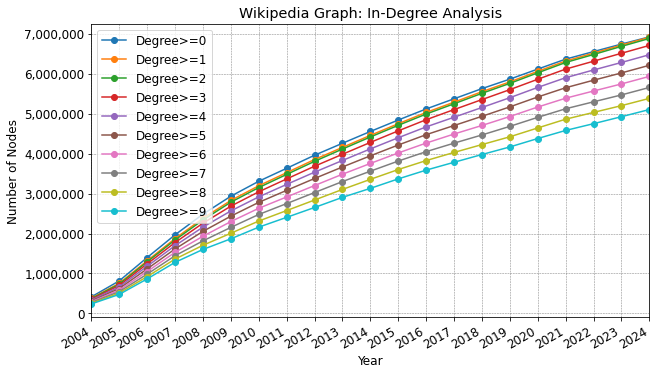

In [173]:
def custom_formatter(x, pos):
    return '{:,}'.format(int(x))

year_range = np.arange(start_year, end_year + 1)
node_size_key = 'graph-size'

plt.rcParams['font.size'] = 12
fig, ax1 = plt.subplots(figsize=(10, 6))

data = {}
for i in range(len(stats_data_list)):
    label=f"Degree>={i}"
    # ax1.plot(year_range, stats_data_list[i], label=f"In-Degree >= {i}", marker='o')  # 第四条线
    data[label] = stats_data_list[i]
    
df = pd.DataFrame(data, index=year_range)
df.plot(ax=ax1, marker='o')


ax1.set_xlim(start_year, end_year)
ax1.set_xticks(year_range)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Nodes')

formatter = FuncFormatter(custom_formatter)
ax1.yaxis.set_major_formatter(formatter)

plt.title(f'Wikipedia Graph: In-Degree Analysis')
# plt.title()
ax1.legend()

plt.grid(True,axis='both' , which='both', linestyle='--', linewidth=0.5, color='gray')
# plt.grid(True)
# 显示图表
plt.gcf().autofmt_xdate()  # 自动旋转和调整日期标签
# 添加标题和轴标签
plt.show()

In [174]:
# 保存到 xslx
title = "Wikipedia Raw"
df.to_excel(XLSX_WRITER, sheet_name=title, index=True)

workbook = XLSX_WRITER.book
worksheet = XLSX_WRITER.sheets[title]

# 获取数据范围
num_rows, num_cols = df.shape  # 获取行数和列数
start_row = 1  # 数据开始的行（Excel 中 A2 行，0 为标题行）
end_row = start_row + num_rows - 1  # 数据结束行
category_col  = 0  # 月份列（第 1 列，索引从 0 开始）
sales_col = 1  # 销售列（第 2 列）

# 创建折线图
chart = workbook.add_chart({"type": "line"})
for col_idx, col_name in enumerate(df.columns, start=1):
    chart.add_series({
        "name":       col_name,  # 图表中的系列名称
        "categories": [title, start_row, category_col, end_row, category_col],  # 分类轴为索引
        "values":     [title, start_row, col_idx, end_row, col_idx],  # 值列
    })
chart.set_title({"name": "Wikipedia Graph: In-Degree Analysis"})
chart.set_x_axis({"name": "Year"})
chart.set_y_axis({"name": "Number of Nodes",  'num_format': '#,##0'})
chart.set_size({'width': 600, 'height': 400})

# 插入图表
worksheet.insert_chart("B2", chart)

0

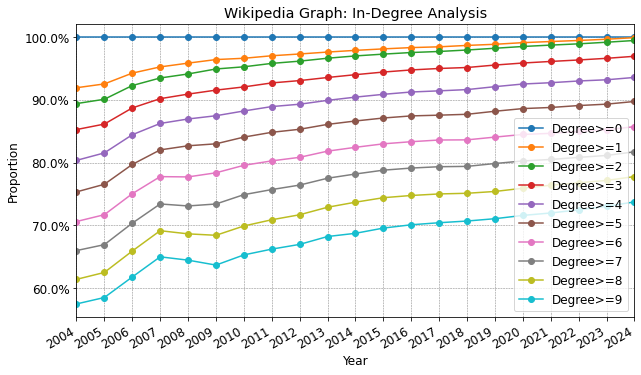

In [175]:
from matplotlib.ticker import PercentFormatter

year_range = [year for year in range(start_year, end_year+1)]
node_size_key = 'graph-size'

plt.rcParams['font.size'] = 12
fig, ax1 = plt.subplots(figsize=(10, 6))

data = {}
for i in range(len(stats_data_list)):
    # ax1.plot(year_range, stats_data_list[i]/stats_data_list[0], label=f"Degree >= {i}", marker='o')  # 第四条线
    label=f"Degree>={i}"
    data[label] = stats_data_list[i]/stats_data_list[0]
    
df = pd.DataFrame(data, index=year_range)
df.plot(ax=ax1, marker='o')

ax1.set_xlim(start_year, end_year)
ax1.set_xticks(year_range)
ax1.set_xlabel('Year')
ax1.set_ylabel('Proportion')

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))  

plt.title(f'Wikipedia Graph: In-Degree Analysis')
# plt.title()
ax1.legend()

plt.grid(True,axis='both' , which='both', linestyle='--', linewidth=0.5, color='gray')
# plt.grid(True)
# 显示图表
plt.gcf().autofmt_xdate()  # 自动旋转和调整日期标签
# 添加标题和轴标签
plt.show()

In [176]:
# 保存到 xslx
title = "Wikipedia Ratios"
df.to_excel(XLSX_WRITER, sheet_name=title, index=True)

workbook = XLSX_WRITER.book
worksheet = XLSX_WRITER.sheets[title]

# 获取数据范围
num_rows, num_cols = df.shape  # 获取行数和列数
start_row = 1  # 数据开始的行（Excel 中 A2 行，0 为标题行）
end_row = start_row + num_rows - 1  # 数据结束行
category_col  = 0  # 月份列（第 1 列，索引从 0 开始）
sales_col = 1  # 销售列（第 2 列）

# 创建折线图
chart = workbook.add_chart({"type": "line"})
for col_idx, col_name in enumerate(df.columns, start=1):
    chart.add_series({
        "name":       col_name,  # 图表中的系列名称
        "categories": [title, start_row, category_col, end_row, category_col],  # 分类轴为索引
        "values":     [title, start_row, col_idx, end_row, col_idx],  # 值列
    })
chart.set_title({"name": "Wikipedia Graph: In-Degree Analysis"})
chart.set_x_axis({"name": "Year"})
chart.set_y_axis({"name": "Percentage",  'num_format': '0%', 'max':1, 'min':0.5})
chart.set_size({'width': 600, 'height': 400})

# 插入图表
worksheet.insert_chart("B2", chart)

0

# OpenAlex

In [177]:
database_name = f"openalex_v{env_config['OPENALEX_VERSION']}"
openalex_stats_collection = pymongo.MongoClient(env_config['Mongo_Url'])[database_name]["degree_stats"]
openalex_stats_collection.count_documents({})

85

In [178]:
# 画 10 条曲线, 统计 linksin 度分布曲线

start_year, end_year = 1940,2024

stats_data_list = []
for _ in range(10):
    stats_data_map = np.full(end_year - start_year + 1, 0)
    stats_data_list.append(stats_data_map)
   
for doc in openalex_stats_collection.find():
    index = doc['year'] - start_year
    if index < 0:
        continue
    data = doc['linksInStats']
    
    for key, value in data.items():
        key = int(key)
        for i in range(len(stats_data_list)):
            if key >= i:
                stats_data_list[i][index] += value

# stats_data_list

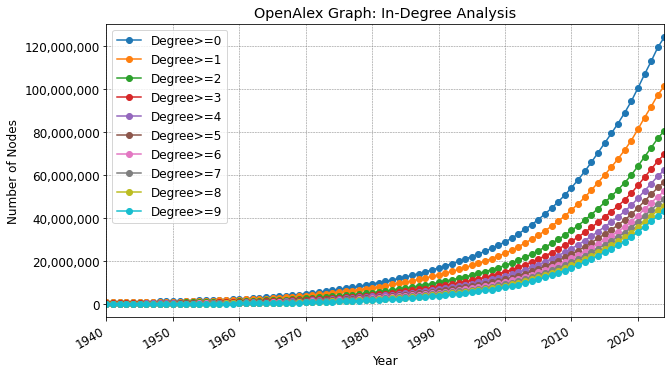

In [179]:

def custom_formatter(x, pos):
    return '{:,}'.format(int(x))

year_range = [year for year in range(start_year, end_year+1)]
node_size_key = 'graph-size'

plt.rcParams['font.size'] = 12
fig, ax1 = plt.subplots(figsize=(10, 6))

data = {}
for i in range(len(stats_data_list)):
    label=f"Degree>={i}"
    # ax1.plot(year_range, stats_data_list[i], label=f"Degree>={i}", marker='o')  # 第四条线
    data[label] = stats_data_list[i]
    
df = pd.DataFrame(data, index=year_range)
df.plot(ax=ax1, marker='o')

ax1.set_xlim(start_year, end_year)
# ax1.set_xticks(year_range)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Nodes')

formatter = FuncFormatter(custom_formatter)
ax1.yaxis.set_major_formatter(formatter)

plt.title(f'OpenAlex Graph: In-Degree Analysis')
# plt.title()
ax1.legend()

plt.grid(True,axis='both' , which='both', linestyle='--', linewidth=0.5, color='gray')
# plt.grid(True)
# 显示图表
plt.gcf().autofmt_xdate()  # 自动旋转和调整日期标签
# 添加标题和轴标签
plt.show()

In [180]:
# 保存到 xslx
title = "OpenAlex Raw"
df.to_excel(XLSX_WRITER, sheet_name=title, index=True)

workbook = XLSX_WRITER.book
worksheet = XLSX_WRITER.sheets[title]

# 获取数据范围
num_rows, num_cols = df.shape  # 获取行数和列数
start_row = 1  # 数据开始的行（Excel 中 A2 行，0 为标题行）
end_row = start_row + num_rows - 1  # 数据结束行
category_col  = 0  # 月份列（第 1 列，索引从 0 开始）
sales_col = 1  # 销售列（第 2 列）

# 创建折线图
chart = workbook.add_chart({"type": "line"})
for col_idx, col_name in enumerate(df.columns, start=1):
    chart.add_series({
        "name":       col_name,  # 图表中的系列名称
        "categories": [title, start_row, category_col, end_row, category_col],  # 分类轴为索引
        "values":     [title, start_row, col_idx, end_row, col_idx],  # 值列
    })
chart.set_title({"name": "OpenAlex Graph: In-Degree Analysis"})
chart.set_x_axis({"name": "Year"})
# chart.set_y_axis({"name": "Percentage",  'num_format': '0%', 'max':1, 'min':0.5})
chart.set_y_axis({"name": "Number of Nodes",  'num_format': '#,##0'})
chart.set_size({'width': 600, 'height': 400})

# 插入图表
worksheet.insert_chart("B2", chart)

0

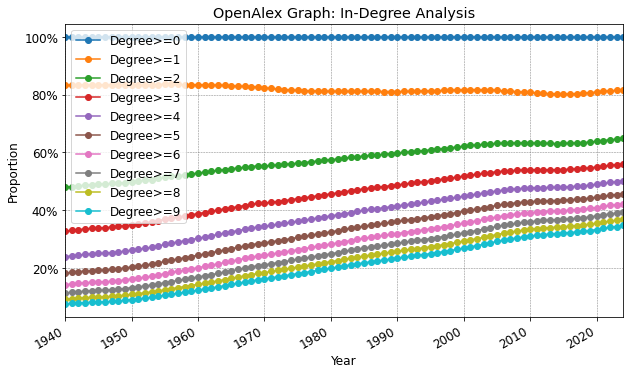

In [181]:
from matplotlib.ticker import PercentFormatter

year_range = [year for year in range(start_year, end_year+1)]
node_size_key = 'graph-size'

plt.rcParams['font.size'] = 12
fig, ax1 = plt.subplots(figsize=(10, 6))

data = {}
for i in range(len(stats_data_list)):
    label=f"Degree>={i}"
    # ax1.plot(year_range, stats_data_list[i]/stats_data_list[0], label=f"Degree>={i}", marker='o')  # 第四条线
    data[label] = stats_data_list[i]/stats_data_list[0]
    
df = pd.DataFrame(data, index=year_range)
df.plot(ax=ax1, marker='o')

ax1.set_xlim(start_year, end_year)
# ax1.set_xticks(year_range)
ax1.set_xlabel('Year')
ax1.set_ylabel('Proportion')

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))  

plt.title(f'OpenAlex Graph: In-Degree Analysis')
# plt.title()
ax1.legend()

plt.grid(True,axis='both' , which='both', linestyle='--', linewidth=0.5, color='gray')
# plt.grid(True)
# 显示图表
plt.gcf().autofmt_xdate()  # 自动旋转和调整日期标签
# 添加标题和轴标签
plt.show()

In [182]:
# 保存到 xslx
title = "OpenAlex Ratios"
df.to_excel(XLSX_WRITER, sheet_name=title, index=True)

workbook = XLSX_WRITER.book
worksheet = XLSX_WRITER.sheets[title]

# 获取数据范围
num_rows, num_cols = df.shape  # 获取行数和列数
start_row = 1  # 数据开始的行（Excel 中 A2 行，0 为标题行）
end_row = start_row + num_rows - 1  # 数据结束行
category_col  = 0  # 月份列（第 1 列，索引从 0 开始）
sales_col = 1  # 销售列（第 2 列）

# 创建折线图
chart = workbook.add_chart({"type": "line"})
for col_idx, col_name in enumerate(df.columns, start=1):
    chart.add_series({
        "name":       col_name,  # 图表中的系列名称
        "categories": [title, start_row, category_col, end_row, category_col],  # 分类轴为索引
        "values":     [title, start_row, col_idx, end_row, col_idx],  # 值列
    })
chart.set_title({"name": "OpenAlex Graph: In-Degree Analysis"})
chart.set_x_axis({"name": "Year"})
chart.set_y_axis({"name": "Percentage",  'num_format': '0%', 'max':1, 'min':0})
chart.set_size({'width': 600, 'height': 400})

# 插入图表
worksheet.insert_chart("B2", chart)

0

In [183]:
XLSX_WRITER.close()

# 点边分布统计

## Wikipedia

In [184]:
database_name = f"wikipedia_dump_v{env_config['WIKI_VERSION']}"
wikipedia_stats_collection = pymongo.MongoClient(env_config['Mongo_Url'])[database_name]["degree_stats"]
wikipedia_stats_collection.count_documents({})


start_year, end_year = 2004,2024

node_count_list = np.full(end_year - start_year + 1, 0)
edge_count_list = np.full(end_year - start_year + 1, 0)
   
for doc in wikipedia_stats_collection.find():
    index = doc['year'] - start_year
    if index < 0:
        continue
    data = doc['linksInStats']
    
    for key, value in data.items():
        key = int(key)
        node_count_list[index] += value
        edge_count_list[index] += key * value

# stats_data_list

In [185]:
# 打开一个 xlsx 文件
XLSX_WRITER = pd.ExcelWriter('Statistics_of_nodes_and_edges.xlsx', engine="xlsxwriter")

df = pd.DataFrame({
    'nodes': node_count_list,
    'edges': edge_count_list,
    'edges-nodes ratio': edge_count_list/node_count_list,
    }, index=np.arange(start_year, end_year + 1))

title = "Wikipedia"
df.to_excel(XLSX_WRITER, sheet_name=title, index=True)

workbook = XLSX_WRITER.book
worksheet = XLSX_WRITER.sheets[title]

# 获取数据范围
num_rows, num_cols = df.shape  # 获取行数和列数
start_row = 1  # 数据开始的行（Excel 中 A2 行，0 为标题行）
end_row = start_row + num_rows - 1  # 数据结束行
category_col  = 0  # 月份列（第 1 列，索引从 0 开始）
sales_col = 1  # 销售列（第 2 列）


# 创建折线图
chart = workbook.add_chart({"type": "line"})

# 添加比例到次 Y 轴
chart.add_series({
    "name": "E/N Ratio",
    "categories": [title, 1, 0, end_row, 0],  # 年份
    "values": [title, 1, 3, end_row, 3],  # 比例
    "y2_axis": True,  # 设置为次 Y 轴
})

# 添加点数和边数到主 Y 轴
chart.add_series({
    "name": "Edges",
    "categories": [title, 1, 0, end_row, 0],  # 年份
    "values": [title, 1, 2, end_row, 2],  # 边数
})
chart.add_series({
    "name": "Nodes",
    "categories": [title, 1, 0, end_row, 0],  # 年份
    "values": [title, 1, 1, end_row, 1],  # 点数
})


# 设置轴属性
chart.set_title({"name": "Number of Nodes and Edges (Wikipedia)"})
chart.set_x_axis({"name": "Year"})
chart.set_y_axis({
    "name": "Counts",
    "num_format": "#,##0",  # 主 Y 轴使用整数格式
})
chart.set_y2_axis({
    "name": "Ratio (%)",
    "num_format": "0%",  # 次 Y 轴使用百分比格式
})

# 设置图表大小
chart.set_size({"width": 600, "height": 400})

# 插入图表
worksheet.insert_chart("F2", chart)


0

# OpenAlex 学科网络点边统计(有1度以上的)

In [186]:
database_name = f"openalex_v{env_config['OPENALEX_VERSION']}"
openAlex_stats_collection = pymongo.MongoClient(env_config['Mongo_Url'])[database_name]["degree_stats"]
openAlex_stats_collection.count_documents({})


start_year, end_year = 2004,2024

node_count_list = np.full(end_year - start_year + 1, 0)
edge_count_list = np.full(end_year - start_year + 1, 0)
   
for doc in openAlex_stats_collection.find():
    index = doc['year'] - start_year
    if index < 0:
        continue
    data = doc['linksInStats']
    
    # 包含0度, 所以 node 数量不会损失
    for key, value in data.items():
        key = int(key)
        node_count_list[index] += value
        edge_count_list[index] += key * value

# stats_data_list

In [187]:

df = pd.DataFrame({
    'nodes': node_count_list,
    'edges': edge_count_list,
    'edges-nodes ratio': edge_count_list/node_count_list,
    }, index=np.arange(start_year, end_year + 1))

title = "OpenAlex D>0"
df.to_excel(XLSX_WRITER, sheet_name=title, index=True)

workbook = XLSX_WRITER.book
worksheet = XLSX_WRITER.sheets[title]

# 获取数据范围
num_rows, num_cols = df.shape  # 获取行数和列数
start_row = 1  # 数据开始的行（Excel 中 A2 行，0 为标题行）
end_row = start_row + num_rows - 1  # 数据结束行
category_col  = 0  # 月份列（第 1 列，索引从 0 开始）
sales_col = 1  # 销售列（第 2 列）


# 创建折线图
chart = workbook.add_chart({"type": "line"})

# 添加比例到次 Y 轴
chart.add_series({
    "name": "E/N Ratio",
    "categories": [title, 1, 0, end_row, 0],  # 年份
    "values": [title, 1, 3, end_row, 3],  # 比例
    "y2_axis": True,  # 设置为次 Y 轴
})

# 添加点数和边数到主 Y 轴
chart.add_series({
    "name": "Edges",
    "categories": [title, 1, 0, end_row, 0],  # 年份
    "values": [title, 1, 2, end_row, 2],  # 边数
})
chart.add_series({
    "name": "Nodes",
    "categories": [title, 1, 0, end_row, 0],  # 年份
    "values": [title, 1, 1, end_row, 1],  # 点数
})


# 设置轴属性
chart.set_title({"name": "Number of Nodes and Edges (OpenAlex D>0)"})
chart.set_x_axis({"name": "Year"})
chart.set_y_axis({
    "name": "Counts",
    "num_format": "#,##0",  # 主 Y 轴使用整数格式
})
chart.set_y2_axis({
    "name": "Ratio (%)",
    "num_format": "0%",  # 次 Y 轴使用百分比格式
})

# 设置图表大小
chart.set_size({"width": 600, "height": 400})

# 插入图表
worksheet.insert_chart("F2", chart)


0

# OpenAlex 学科网络点边统计(入度2以上网络)

In [188]:
database_name = f"openalex_v{env_config['OPENALEX_VERSION']}"
openalex_entropy_collection = pymongo.MongoClient(env_config['Mongo_Url'])[database_name]["entropy"]
openalex_entropy_collection.count_documents({})

start_year, end_year = 1940,2024

node_count_list = np.full(end_year - start_year + 1, 0)
edge_count_list = np.full(end_year - start_year + 1, 0)

for year in range(start_year, end_year+1):
    doc = openalex_entropy_collection.find_one({"year": year,"startPercent":0,"endPercent":100, "entropyType": "degree"})
    index = year - start_year
    if index < 0:
        continue
    node_count_list[index] = doc['graphSize']
    edge_count_list[index] = doc['edgeCount']

# stats_data_list

In [189]:

df = pd.DataFrame({
    'nodes': node_count_list,
    'edges': edge_count_list,
    'edges-nodes ratio': edge_count_list/node_count_list,
    }, index=np.arange(start_year, end_year + 1))

title = "OpenAlex In-D>=2"
df.to_excel(XLSX_WRITER, sheet_name=title, index=True)

workbook = XLSX_WRITER.book
worksheet = XLSX_WRITER.sheets[title]

# 获取数据范围
num_rows, num_cols = df.shape  # 获取行数和列数
start_row = 1  # 数据开始的行（Excel 中 A2 行，0 为标题行）
end_row = start_row + num_rows - 1  # 数据结束行
category_col  = 0  # 月份列（第 1 列，索引从 0 开始）
sales_col = 1  # 销售列（第 2 列）


# 创建折线图
chart = workbook.add_chart({"type": "line"})

# 添加比例到次 Y 轴
chart.add_series({
    "name": "E/N Ratio",
    "categories": [title, 1, 0, end_row, 0],  # 年份
    "values": [title, 1, 3, end_row, 3],  # 比例
    "y2_axis": True,  # 设置为次 Y 轴
})

# 添加点数和边数到主 Y 轴
chart.add_series({
    "name": "Edges",
    "categories": [title, 1, 0, end_row, 0],  # 年份
    "values": [title, 1, 2, end_row, 2],  # 边数
})
chart.add_series({
    "name": "Nodes",
    "categories": [title, 1, 0, end_row, 0],  # 年份
    "values": [title, 1, 1, end_row, 1],  # 点数
})


# 设置轴属性
chart.set_title({"name": "Number of Nodes and Edges (OpenAlex In-D>=2)"})
chart.set_x_axis({"name": "Year"})
chart.set_y_axis({
    "name": "Counts",
    "num_format": "#,##0",  # 主 Y 轴使用整数格式
})
chart.set_y2_axis({
    "name": "Ratio (%)",
    "num_format": "0%",  # 次 Y 轴使用百分比格式
})

# 设置图表大小
chart.set_size({"width": 600, "height": 400})

# 插入图表
worksheet.insert_chart("F2", chart)


0

In [190]:

XLSX_WRITER.close()

# 统计个学科的网络点边数量

## wikipedia

In [ ]:
subject_list = [
    "Mathematics", "Physics", "Computer science", "Engineering disciplines", "Medicine",
    "Biology", "Chemistry", "Materials science", "Geology", "Geography", "Environmental science",
    "Economics", "Sociology", "Psychology", "Political science", "Philosophy", "Business", "Art",
    "History"
]

In [194]:
database_name = f"wikipedia_dump_v{env_config['WIKI_VERSION']}"
wikipedia_entropy_collection = pymongo.MongoClient(env_config['Mongo_Url'])[database_name]["subject_entropy"]
wikipedia_entropy_collection.count_documents({})

start_year, end_year = 2004,2024

nodes_map = collections.defaultdict(lambda:np.full(end_year - start_year + 1, np.nan))
edges_map = collections.defaultdict(lambda:np.full(end_year - start_year + 1, np.nan))

for doc in wikipedia_entropy_collection.find():
    index = doc['year'] - start_year
    if index < 0:
        continue
    graphSize = doc['graphSize']
    edgeCount = doc['edgeCount']
    
    nodes_map[doc['subject']][index] = graphSize
    edges_map[doc['subject']][index] = edgeCount


In [201]:
XLSX_WRITER = pd.ExcelWriter('subject_statistics_of_nodes_and_edges.xlsx', engine="xlsxwriter")

In [197]:

def draw_xlsx_sheet(sheet_writer, df, sheetTitle, chartTitle,x_axis_label,y_axis_label, y_axis_format, y_axis_max=1, y_axis_min=0):
    df.to_excel(sheet_writer, sheet_name=sheetTitle, index=True)

    workbook = sheet_writer.book
    worksheet = sheet_writer.sheets[sheetTitle]

    # 获取数据范围
    num_rows, num_cols = df.shape  # 获取行数和列数
    start_row = 1  # 数据开始的行（Excel 中 A2 行，0 为标题行）
    end_row = start_row + num_rows - 1  # 数据结束行
    category_col  = 0  # 月份列（第 1 列，索引从 0 开始）
    sales_col = 1  # 销售列（第 2 列）

    # 创建折线图
    chart = workbook.add_chart({"type": "line"})
    for col_idx, col_name in enumerate(df.columns, start=1):
        chart.add_series({
            "name":       col_name,  # 图表中的系列名称
            "categories": [sheetTitle, start_row, category_col, end_row, category_col],  # 分类轴为索引
            "values":     [sheetTitle, start_row, col_idx, end_row, col_idx],  # 值列
        })
        
    chart.set_title({"name": chartTitle})
    chart.set_x_axis({"name": x_axis_label})
    if y_axis_format == "percent":
        chart.set_y_axis({"name": y_axis_label,  'num_format': '0%', 'max':y_axis_max, 'min':y_axis_min})
    else:
        chart.set_y_axis({"name": y_axis_label,  'num_format': '#,##0'})
    chart.set_size({'width': 600, 'height': 400})

    # 插入图表
    worksheet.insert_chart("F2", chart)

In [ ]:
df_nodes = pd.DataFrame(nodes_map, index=np.arange(start_year, end_year + 1))
df_edges = pd.DataFrame(edges_map, index=np.arange(start_year, end_year + 1))
df_ratio = pd.DataFrame({key: value/edges_map[key] for key,value in nodes_map.items()}, index=np.arange(start_year, end_year + 1))

draw_xlsx_sheet(XLSX_WRITER, 
                df_nodes, 
                "Wikipedia_Nodes",
                "Number of Nodes (Wikipedia subject)",
                "Year",
                "Count",
                "number")

draw_xlsx_sheet(XLSX_WRITER, 
                df_edges, 
                "Wikipedia_Edges",
                "Number of Edges (Wikipedia subject)",
                "Year",
                "Count",
                "number")

draw_xlsx_sheet(XLSX_WRITER, 
                df_ratio, 
                "Wikipedia_EN Ratios",
                "Edges/Nodes Ratios (Wikipedia subject)",
                "Year",
                "Percentage",
                "percent")


/tmp/ipykernel_2293934/613338125.py:3: RuntimeWarning: invalid value encountered in divide
  df_ratio = pd.DataFrame({key: value/edges_map[key] for key,value in nodes_map.items()}, index=np.arange(start_year, end_year + 1))


In [203]:
XLSX_WRITER.close()